<a href="https://colab.research.google.com/github/andrewwgordon/NASA_C-MAPSS/blob/main/NASA_C_MAPSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import the Numpy and Pandas libraries
import numpy as np
import pandas as pd

In [4]:
# set the directory path to the C-MAPSS datasets (note this will differ on Windows)
dir_path = './CMaps/'
# define the dataframe column names as a list
column_names = [
    'unit',
    'cycles',
    'altitude',
    'air_speed',
    'throttle_angle'
]
# programatically generate the sensor names
sensor_names = ['sensor_{}'.format(i) for i in range(1,22)]
# concatenate the column names together
column_names = column_names + sensor_names
# load the train_FD001.txt dataset as a space delimited file (sep='\s+')
fd001_train = pd.read_csv((dir_path + 'train_FD001.txt'), sep='\s+', header = None, names = column_names)

In [5]:
# provide a statistical summary of the dataset
fd001_train.describe()

,unit,cycles,altitude,air_speed,throttle_angle,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [11]:
# display an initial set of rows
fd001_train.head()

,unit,cycles,altitude,air_speed,throttle_angle,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [12]:
# filter the dataset where sensor_13 > 200 and unit equals 25 and extract only the altitude column into a new dataframe new_df
new_df = fd001_train[(fd001_train['sensor_13'] > 200) & (fd001_train['unit']==25)]['altitude']

In [ ]:
new_df.head()

In [14]:
# show the maximum number of cycles per engine unit no as a dataframe (reset_index)
fd001_train.groupby(['unit'])['cycles'].max().reset_index()

,unit,cycles
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


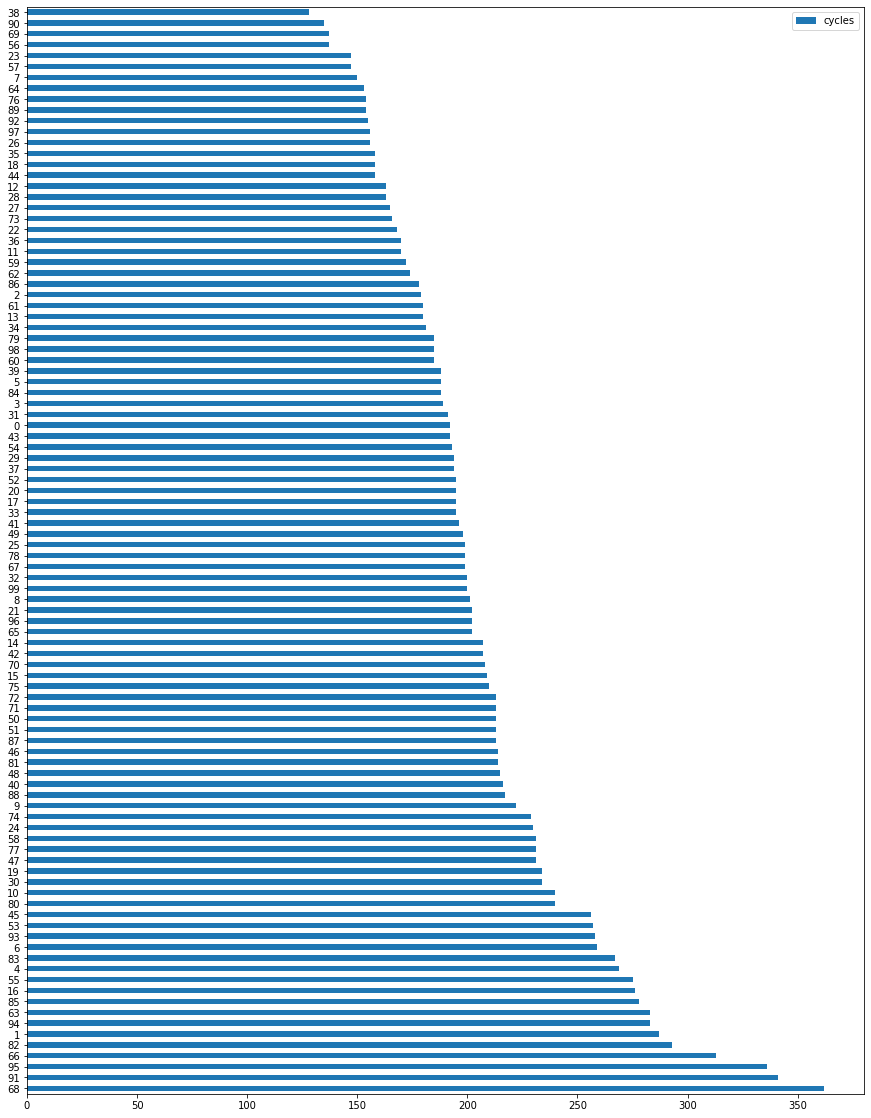

In [15]:
# get the maximum number of cycles per engine unit as a dataframe, sort by cycles descending and plot as a horizontal
# bar graph with a figsize of 15,20
fd001_train.groupby(['unit'])['cycles'].max().reset_index().sort_values(['cycles'],ascending=False).plot.barh(y='cycles',figsize=(15,20))

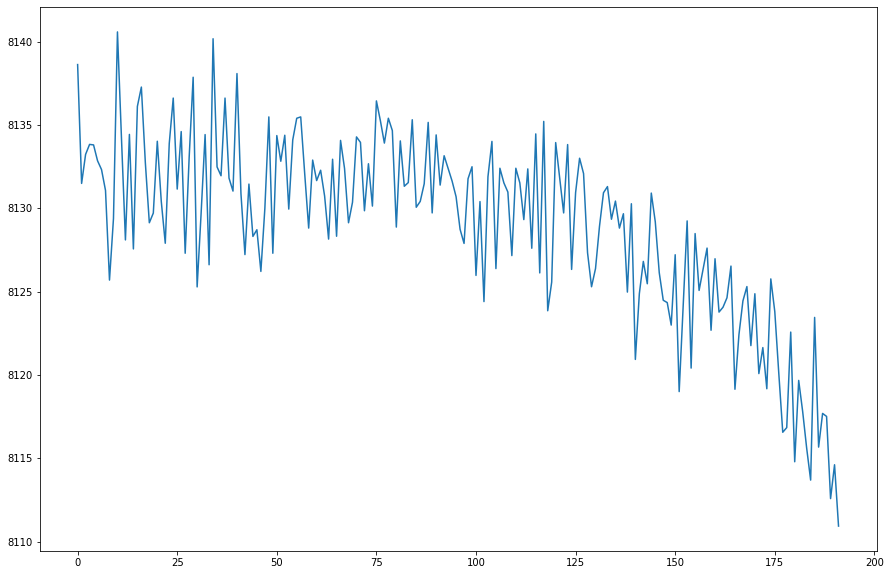

In [20]:
# plot a line graph of sensor_14 where engine unit equals 1
fd001_train[fd001_train['unit']==1]['sensor_14'].plot(figsize=(15,10))

In [ ]:
# Exercise 1
# Load the train_fd001.txt file in a dataframe and specify all 26 columns names 
# as per the specification in slide 6 of the pack
#
#

In [ ]:
# Exercise 2
# Show the mean Altitude grouped by Engine Unit No as a dataframe
#
#

In [ ]:
# Exercise 3
# Plot a line graph of HPC Outlet Static Pressure for Engine Unit No. 35 for Cycles 0 to 50
#
#

In [ ]:
# Exercise 4 (Bonus)
# Plot a scatter graph of HPC Outlet Temperature vs. HPC Outlet Pressure for all Engine Unit Nos.
#
#